In [277]:
import sklearn
import numpy as np
import pandas as pd
import plotly as plot
import plotly.express as px
import plotly.graph_objs as go

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import cufflinks as cf
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,mean_squared_error
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot
df = pd.read_csv("C:/Users/LENOVO/Desktop/heart.csv")
df

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0     2.30   
1     37    1   2       130   250    0        1      187      0     3.50   
2     41    0   1       130   204    0        0      172      0     1.40   
3     56    1   1       120   236    0        1      178      0     0.80   
4     57    0   0       120   354    0        1      163      1     0.60   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1     0.20   
299   45    1   3       110   264    0        1      132      0     1.20   
300   68    1   0       144   193    1        1      141      0     3.40   
301   57    1   0       130   131    0        1      115      1     1.20   
302   57    0   1       130   236    0        0      174      0     0.00   

     slope  ca  thal  target  
0        0   0     1       1  
1        0   0     2       1  
2        2   0     2       1  
3        2   0     2       1  
4        2   0     2       1  
..     ...  ..   ...     ...  
298      1   0     3       0  
299      1   0     3       0  
300      1   2     3       0  
301      1   1     3       0  
302      1   1     2       0  

[303 rows x 14 columns]

In [278]:
info = ["Yaş","1: erkek, 0: kadın","göğüs ağrısı tipi, 1: tipik anjina, 2: atipik anjina, 3: anginal olmayan ağrı, 4: asemptomatik","dinlenme kan basıncı"," mg / dl cinsinden serum kolesterol","açlık kan şekeri> 120 mg / dl","istirahatta elektrokardiyografik sonuçları (0,1,2 değerleri)"," ulaşılan maksimum kalp atış hızı","egzersize bağlı anjina"," oldpeak = Dinlenmeye göre egzersizle tetiklenen ST çökmesi "," doruk egzersiz ST segmentinin eğimi "," florosopi ile renklendirilen ana damar sayısı (0-3) "," tal: 3 = normal; 6 = sabit kusur; 7 = tersine çevrilebilir kusur"]
for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			Yaş
sex:			1: erkek, 0: kadın
cp:			göğüs ağrısı tipi, 1: tipik anjina, 2: atipik anjina, 3: anginal olmayan ağrı, 4: asemptomatik
trestbps:			dinlenme kan basıncı
chol:			 mg / dl cinsinden serum kolesterol
fbs:			açlık kan şekeri> 120 mg / dl
restecg:			istirahatta elektrokardiyografik sonuçları (0,1,2 değerleri)
thalach:			 ulaşılan maksimum kalp atış hızı
exang:			egzersize bağlı anjina
oldpeak:			 oldpeak = Dinlenmeye göre egzersizle tetiklenen ST çökmesi 
slope:			 doruk egzersiz ST segmentinin eğimi 
ca:			 florosopi ile renklendirilen ana damar sayısı (0-3) 
thal:			 tal: 3 = normal; 6 = sabit kusur; 7 = tersine çevrilebilir kusur


In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [279]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [280]:
df.isnull().values.any()

False

In [281]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:>

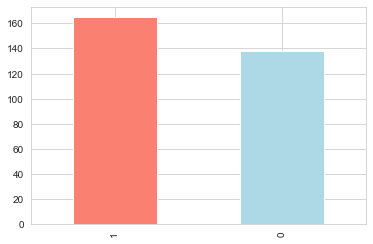

In [282]:
df.target.value_counts().plot(kind="bar", color=["salmon", "lightblue"])

In [283]:
df.groupby('target').sum()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  \
target                                                                  
0       7811  114   66     18547  34650   22       62    19196     76   
1       8662   93  227     21335  39968   23       98    26147     23   

        oldpeak  slope   ca  thal  
target                             
0        218.80    161  161   351  
1         96.20    263   60   350

In [284]:
df.shape

(303, 14)

In [285]:
df.size

4242

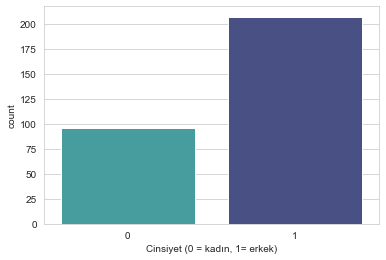

In [286]:
sns.countplot(x='sex', data=df, palette="mako_r")
plt.xlabel("Cinsiyet (0 = kadın, 1= erkek)")
plt.show()

In [287]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Kalp Hastalığı Olmayan Hastaların Yüzdesi: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Kalp Hastalığı Olan Hastaların Yüzdesi: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Kalp Hastalığı Olmayan Hastaların Yüzdesi: 45.54%
Kalp Hastalığı Olan Hastaların Yüzdesi: 54.46%


In [288]:
categorical_val = []
continous_val = []
for column in df.columns:
    print('==============================')
    print(f"{column} : {df[column].unique()}")
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex : [1 0]
cp : [3 2 1 0]
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol : [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs :

In [289]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

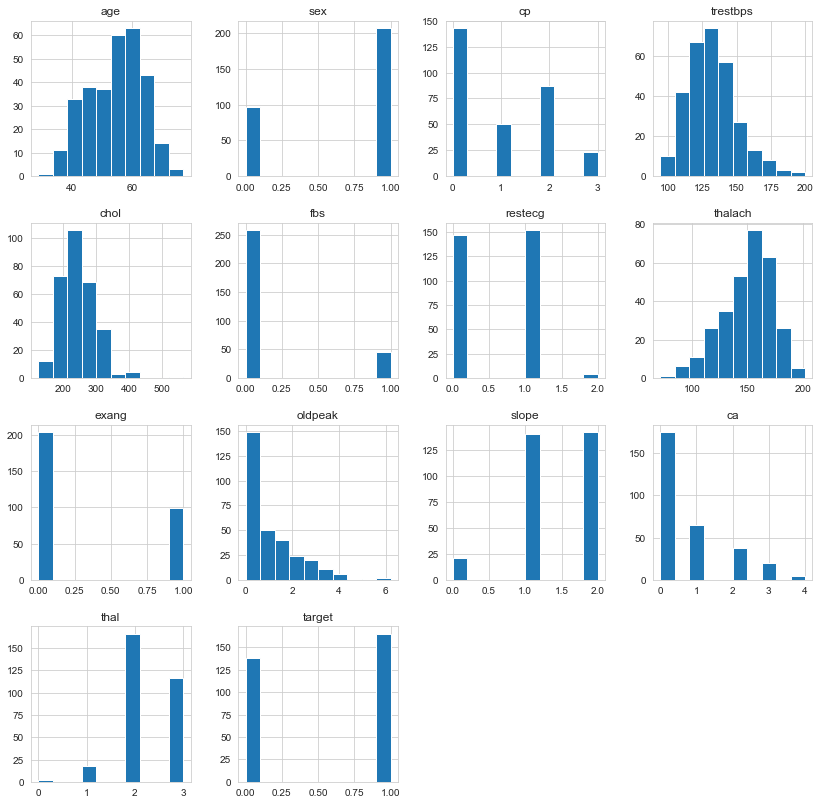

In [290]:
df.hist(figsize=(14,14))
plt.show()

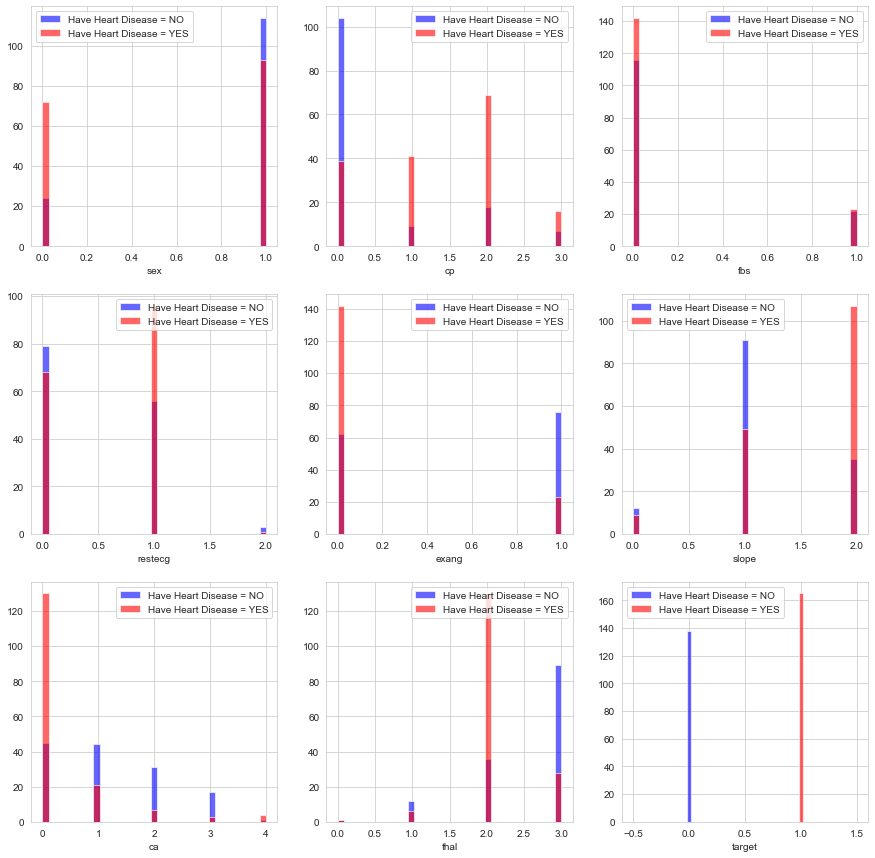

In [291]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

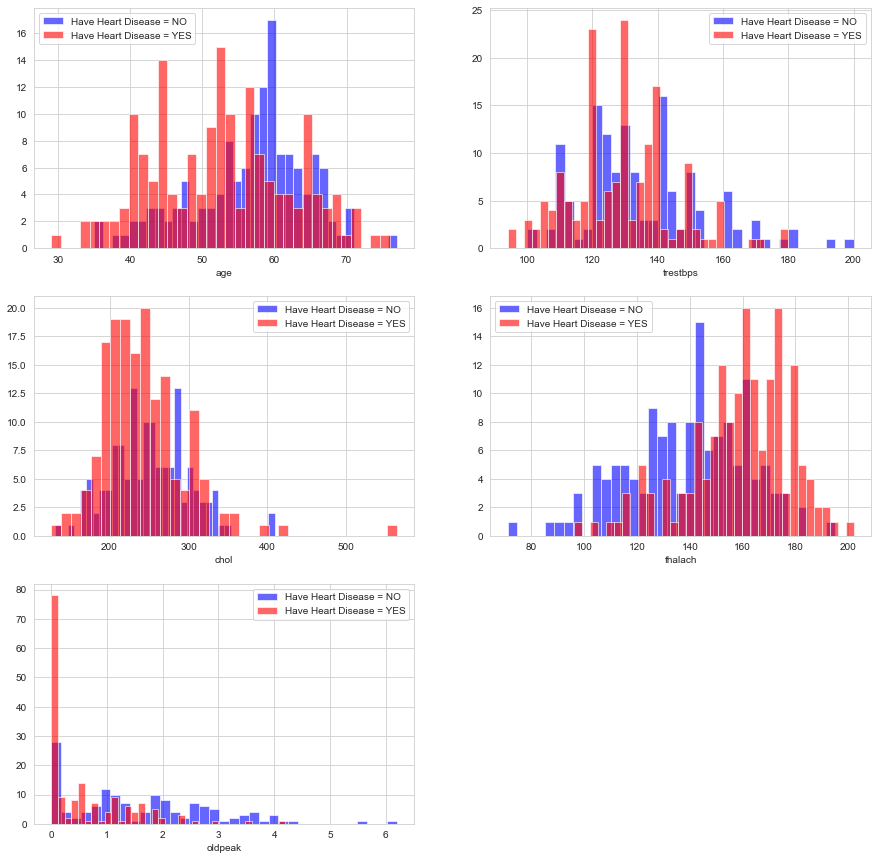

In [292]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

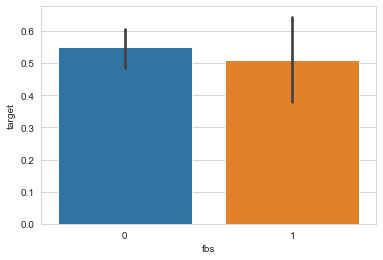

In [293]:
sns.barplot(x="fbs", y="target", data=df)
plt.show()

<AxesSubplot:xlabel='sex', ylabel='age'>

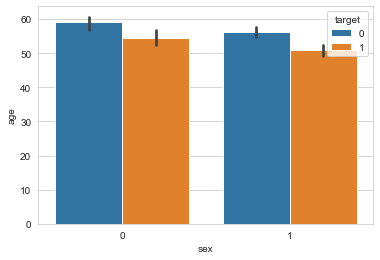

In [294]:
sns.barplot(x=df['sex'],y=df['age'],hue=df['target'])

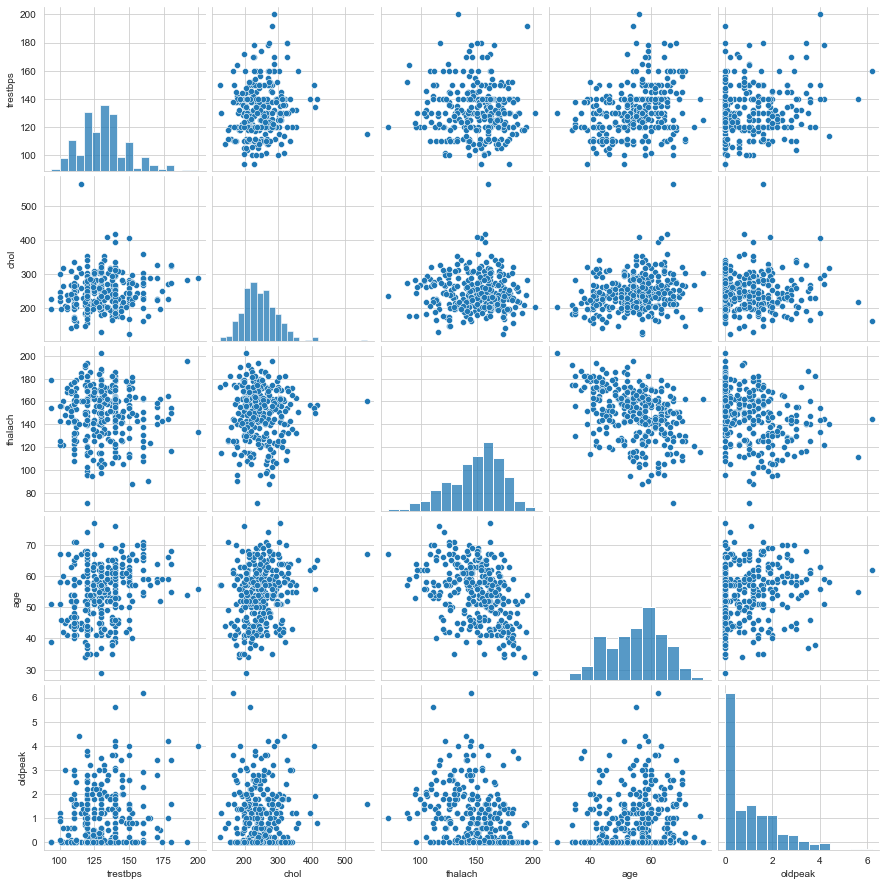

In [295]:
numeric_columns=['trestbps','chol','thalach','age','oldpeak']
sns.pairplot(df[numeric_columns])

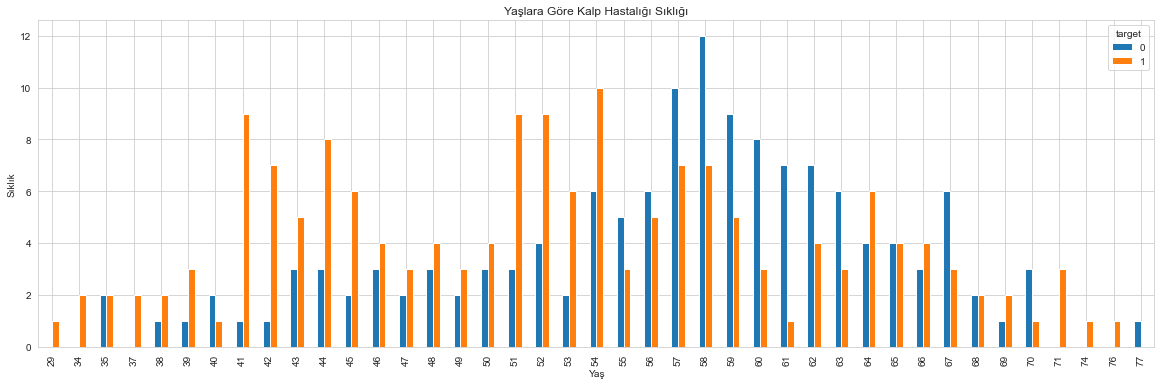

In [296]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Yaşlara Göre Kalp Hastalığı Sıklığı')
plt.xlabel('Yaş')
plt.ylabel('Sıklık')
plt.show()

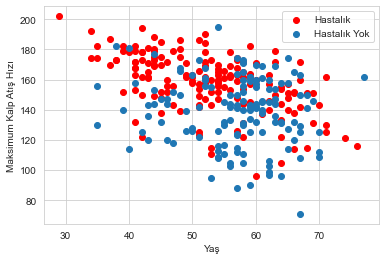

In [297]:
#Kalp Hastalığı için Yaş ve Maksimum Kalp Hızı
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Hastalık", "Hastalık Yok"])
plt.xlabel("Yaş")
plt.ylabel("Maksimum Kalp Atış Hızı")
plt.show()

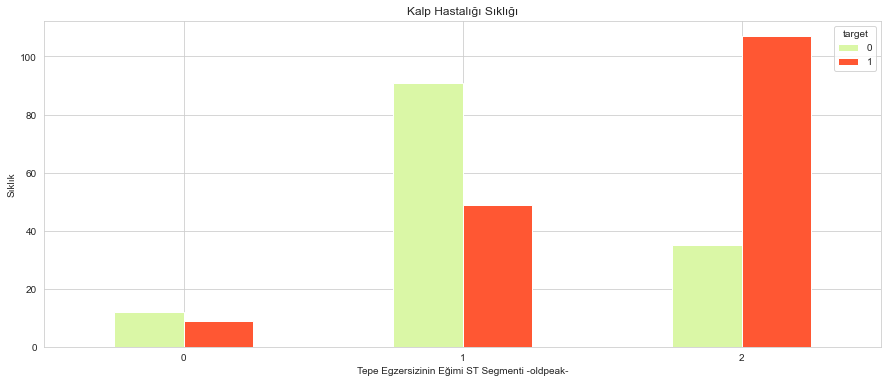

In [298]:
pd.crosstab(df.slope,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Kalp Hastalığı Sıklığı')
plt.xlabel('Tepe Egzersizinin Eğimi ST Segmenti -oldpeak-')
plt.xticks(rotation = 0)
plt.ylabel('Sıklık')
plt.show()

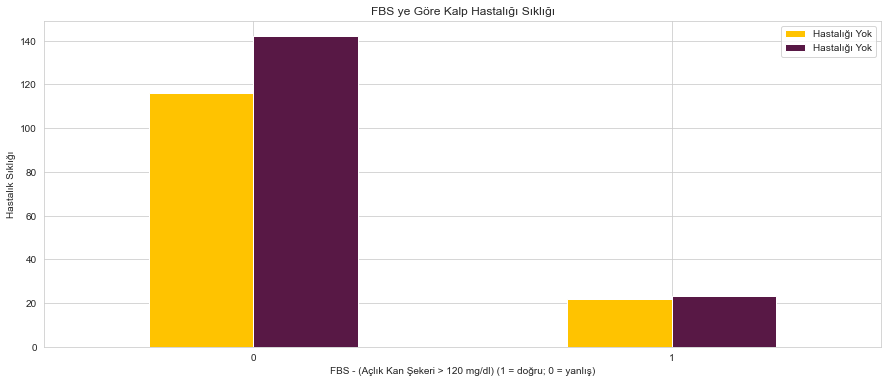

In [299]:
pd.crosstab(df.fbs,df.target).plot(kind="bar",figsize=(15,6),color=['#FFC300','#581845' ])
plt.title('FBS ye Göre Kalp Hastalığı Sıklığı')
plt.xlabel('FBS - (Açlık Kan Şekeri > 120 mg/dl) (1 = doğru; 0 = yanlış)')
plt.xticks(rotation = 0)
plt.legend(["Hastalığı Yok", "Hastalığı Yok"])
plt.ylabel('Hastalık Sıklığı')
plt.show()

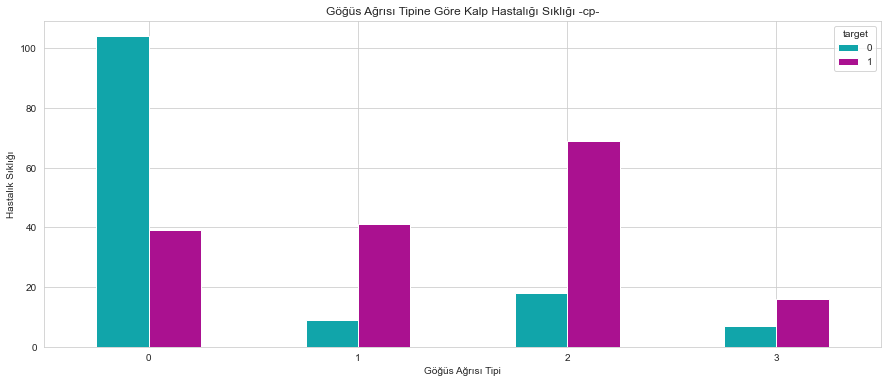

In [300]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(15,6),color=['#11A5AA','#AA1190' ])
plt.title('Göğüs Ağrısı Tipine Göre Kalp Hastalığı Sıklığı -cp-')
plt.xlabel('Göğüs Ağrısı Tipi')
plt.xticks(rotation = 0)
plt.ylabel('Hastalık Sıklığı')
plt.show()

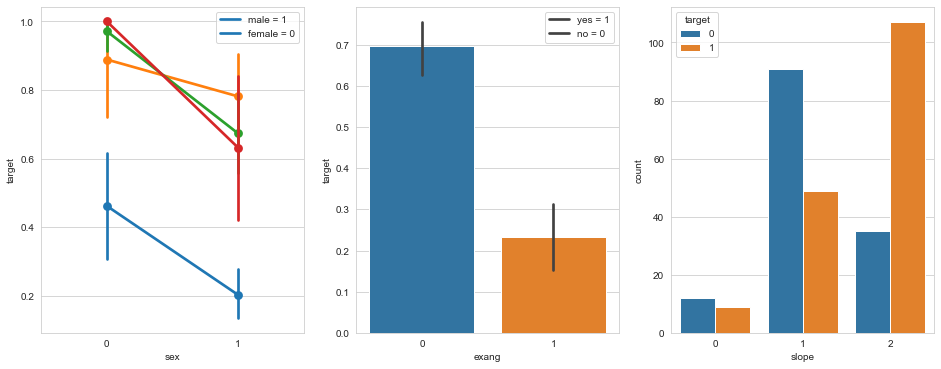

In [301]:
plt.figure(figsize=(16,6))
plt.subplot(131)
sns.pointplot(x="sex", y="target", hue='cp', data=df)
plt.legend(['male = 1', 'female = 0'])
plt.subplot(132)
sns.barplot(x="exang", y="target", data=df)
plt.legend(['yes = 1', 'no = 0'])
plt.subplot(133)
sns.countplot(x="slope", hue='target', data=df)
plt.show()

(14.5, -0.5)

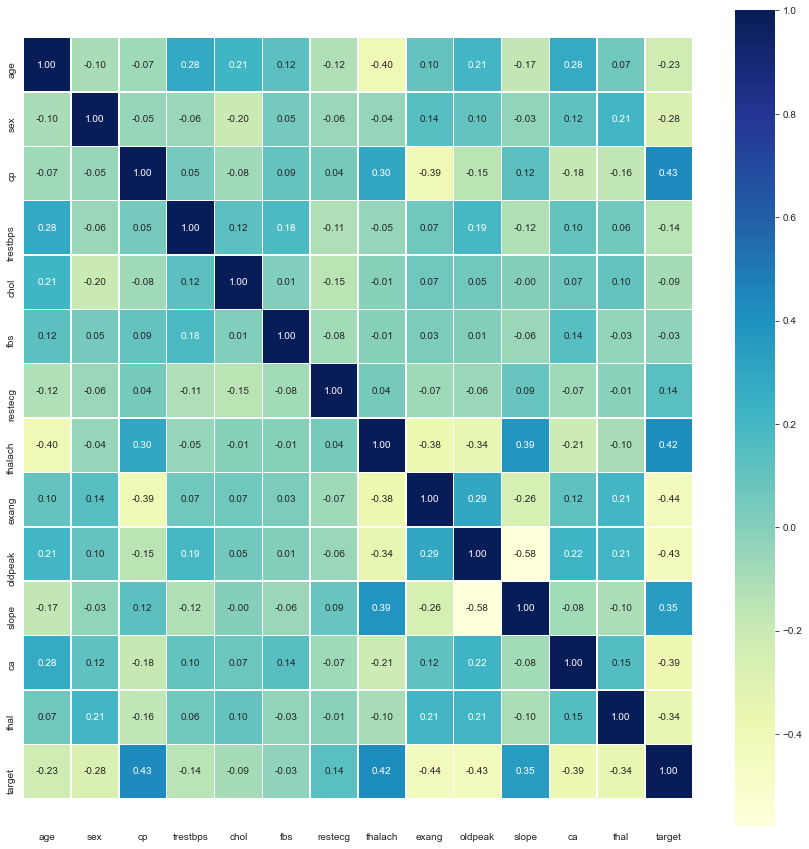

In [302]:
#Korelasyon Matrisi
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [303]:
#Data processing
categorical_val.remove('target')
dataset = pd.get_dummies(df, columns = categorical_val)

In [304]:
dataset.head()

age  trestbps  chol  thalach  oldpeak  target  sex_0  sex_1  cp_0  cp_1  \
0   63       145   233      150     2.30       1      0      1     0     0   
1   37       130   250      187     3.50       1      0      1     0     0   
2   41       130   204      172     1.40       1      1      0     0     1   
3   56       120   236      178     0.80       1      0      1     0     1   
4   57       120   354      163     0.60       1      1      0     1     0   

   ...  slope_2  ca_0  ca_1  ca_2  ca_3  ca_4  thal_0  thal_1  thal_2  thal_3  
0  ...        0     1     0     0     0     0       0       1       0       0  
1  ...        0     1     0     0     0     0       0       0       1       0  
2  ...        1     1     0     0     0     0       0       0       1       0  
3  ...        1     1     0     0     0     0       0       0       1       0  
4  ...        1     1     0     0     0     0       0       0       1       0  

[5 rows x 31 columns]

In [305]:
print(df.columns)
print(dataset.columns)

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target', 'sex_0',
       'sex_1', 'cp_0', 'cp_1', 'cp_2', 'cp_3', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_0', 'slope_1',
       'slope_2', 'ca_0', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_0', 'thal_1',
       'thal_2', 'thal_3'],
      dtype='object')


In [306]:
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")
frames = [df, a, b, c]
df = pd.concat(frames, axis = 1)
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  ...  \
0   63    1   3       145   233    1        0      150      0     2.30  ...   
1   37    1   2       130   250    0        1      187      0     3.50  ...   
2   41    0   1       130   204    0        0      172      0     1.40  ...   
3   56    1   1       120   236    0        1      178      0     0.80  ...   
4   57    0   0       120   354    0        1      163      1     0.60  ...   

   cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  thal_3  slope_0  slope_1  slope_2  
0     0     0     1       0       1       0       0        1        0        0  
1     0     1     0       0       0       1       0        1        0        0  
2     1     0     0       0       0       1       0        0        0        1  
3     1     0     0       0       0       1       0        0        0        1  
4     0     0     0       0       0       1       0        0        0        1  

[5 rows x 25 columns]

In [307]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [308]:
# Normalize etme
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [309]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=0)

In [310]:
#transpose matrisler
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T

In [311]:
#initialize
def initialize(dimension):
    
    weight = np.full((dimension,1),0.01)
    bias = 0.0
    return weight,bias

In [312]:
def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head

In [313]:
def forwardBackward(weight,bias,x_train,y_train):
    # Forward
    
    y_head = sigmoid(np.dot(weight.T,x_train) + bias)
    loss = -(y_train*np.log(y_head) + (1-y_train)*np.log(1-y_head))
    cost = np.sum(loss) / x_train.shape[1]
    
    # Backward
    derivative_weight = np.dot(x_train,((y_head-y_train).T))/x_train.shape[1]
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]
    gradients = {"Derivative Weight" : derivative_weight, "Derivative Bias" : derivative_bias}
    
    return cost,gradients

In [314]:
def update(weight,bias,x_train,y_train,learningRate,iteration) :
    costList = []
    index = []
    
    #her yineleme için ağırlık ve sapma değerlerini güncelleme
    for i in range(iteration):
        cost,gradients = forwardBackward(weight,bias,x_train,y_train)
        weight = weight - learningRate * gradients["Derivative Weight"]
        bias = bias - learningRate * gradients["Derivative Bias"]
        
        costList.append(cost)
        index.append(i)

    parameters = {"weight": weight,"bias": bias}
    
    print("iteration:",iteration)
    print("cost:",cost)

    plt.plot(index,costList)
    plt.xlabel("Number of Iteration")
    plt.ylabel("Cost")
    plt.show()

    return parameters, gradients

In [315]:
def predict(weight,bias,x_test):
    z = np.dot(weight.T,x_test) + bias
    y_head = sigmoid(z)

    y_prediction = np.zeros((1,x_test.shape[1]))
    
    for i in range(y_head.shape[1]):
        if y_head[0,i] <= 0.5:
            y_prediction[0,i] = 0
        else:
            y_prediction[0,i] = 1
    return y_prediction

In [316]:
#Makine öğrenimi algoritmalarını uygulama

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Dizi Sonucu:\n================================================")
        print(f"Doğruluk Puanı: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"SINIFLANDIRMA RAPORU:\n{clf_report}")
        print("_______________________________________________")
        print(f"Karışıklık Matrisi: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test sonucu:\n================================================")        
        print(f"Doğruluk Puanı: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"SINIFLANDIRMA RAPORU:\n{clf_report}")
        print("_______________________________________________")
        print(f"karışıklık Matrisi: \n {confusion_matrix(y_test, pred)}\n")

In [317]:
from sklearn.model_selection import train_test_split

X = dataset.drop('target', axis=1)
y = dataset.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [318]:
#Lojistik Regresyon
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Dizi Sonucu:
Doğruluk Puanı: 87.74%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0      1  accuracy  macro avg  weighted avg
precision  0.89   0.87      0.88       0.88          0.88
recall     0.84   0.91      0.88       0.87          0.88
f1-score   0.86   0.89      0.88       0.88          0.88
support   97.00 115.00      0.88     212.00        212.00
_______________________________________________
Karışıklık Matrisi: 
 [[ 81  16]
 [ 10 105]]

Test sonucu:
Doğruluk Puanı: 85.71%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0     1  accuracy  macro avg  weighted avg
precision  0.87  0.85      0.86       0.86          0.86
recall     0.80  0.90      0.86       0.85          0.86
f1-score   0.84  0.87      0.86       0.85          0.86
support   41.00 50.00      0.86      91.00         91.00
_______________________________________________
karışıklık Matrisi: 
 [[33  8]
 [ 5 45]]



In [319]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Lojistik regresyon", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Lojistik regresyon                87.74               85.71

In [320]:
# K-en yakın komşu
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Dizi Sonucu:
Doğruluk Puanı: 77.36%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0      1  accuracy  macro avg  weighted avg
precision  0.78   0.77      0.77       0.77          0.77
recall     0.70   0.83      0.77       0.77          0.77
f1-score   0.74   0.80      0.77       0.77          0.77
support   97.00 115.00      0.77     212.00        212.00
_______________________________________________
Karışıklık Matrisi: 
 [[68 29]
 [19 96]]

Test sonucu:
Doğruluk Puanı: 65.93%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0     1  accuracy  macro avg  weighted avg
precision  0.63  0.68      0.66       0.66          0.66
recall     0.59  0.72      0.66       0.65          0.66
f1-score   0.61  0.70      0.66       0.65          0.66
support   41.00 50.00      0.66      91.00         91.00
_______________________________________________
karışıklık Matrisi: 
 [[24 17]
 [14 36]]



In [321]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-en yakın komşu", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0  Lojistik regresyon                87.74               85.71
1    K-en yakın komşu                77.36               65.93

In [322]:
#Destek Vektör makinesi
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Dizi Sonucu:
Doğruluk Puanı: 100.00%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Karışıklık Matrisi: 
 [[ 97   0]
 [  0 115]]

Test sonucu:
Doğruluk Puanı: 53.85%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0     1  accuracy  macro avg  weighted avg
precision  0.00  0.54      0.54       0.27          0.30
recall     0.00  0.98      0.54       0.49          0.54
f1-score   0.00  0.70      0.54       0.35          0.38
support   41.00 50.00      0.54      91.00         91.00
_______________________________________________
karışıklık Matrisi: 
 [[ 0 41]
 [ 1 49]]



In [323]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Destek Vektör makinesi", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0      Lojistik regresyon                87.74               85.71
1        K-en yakın komşu                77.36               65.93
2  Destek Vektör makinesi               100.00               53.85

In [324]:
#Karar Ağacı
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Dizi Sonucu:
Doğruluk Puanı: 100.00%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Karışıklık Matrisi: 
 [[ 97   0]
 [  0 115]]

Test sonucu:
Doğruluk Puanı: 78.02%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0     1  accuracy  macro avg  weighted avg
precision  0.72  0.84      0.78       0.78          0.79
recall     0.83  0.74      0.78       0.78          0.78
f1-score   0.77  0.79      0.78       0.78          0.78
support   41.00 50.00      0.78      91.00         91.00
_______________________________________________
karışıklık Matrisi: 
 [[34  7]
 [13 37]]



In [325]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Karar Ağacı", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0      Lojistik regresyon                87.74               85.71
1        K-en yakın komşu                77.36               65.93
2  Destek Vektör makinesi               100.00               53.85
3             Karar Ağacı               100.00               78.02

In [326]:
#Rastgele Orman
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Dizi Sonucu:
Doğruluk Puanı: 100.00%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0      1  accuracy  macro avg  weighted avg
precision  1.00   1.00      1.00       1.00          1.00
recall     1.00   1.00      1.00       1.00          1.00
f1-score   1.00   1.00      1.00       1.00          1.00
support   97.00 115.00      1.00     212.00        212.00
_______________________________________________
Karışıklık Matrisi: 
 [[ 97   0]
 [  0 115]]

Test sonucu:
Doğruluk Puanı: 81.32%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0     1  accuracy  macro avg  weighted avg
precision  0.79  0.84      0.81       0.81          0.81
recall     0.80  0.82      0.81       0.81          0.81
f1-score   0.80  0.83      0.81       0.81          0.81
support   41.00 50.00      0.81      91.00         91.00
_______________________________________________
karışıklık Matrisi: 
 [[33  8]
 [ 9 41]]



In [327]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Rastgele Orman", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0      Lojistik regresyon                87.74               85.71
1        K-en yakın komşu                77.36               65.93
2  Destek Vektör makinesi               100.00               53.85
3             Karar Ağacı               100.00               78.02
4          Rastgele Orman               100.00               81.32

In [328]:
#XGBoost Sınıflandırıcı
from xgboost import XGBClassifier

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Dizi Sonucu:
Doğruluk Puanı: 98.58%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0      1  accuracy  macro avg  weighted avg
precision  0.99   0.98      0.99       0.99          0.99
recall     0.98   0.99      0.99       0.99          0.99
f1-score   0.98   0.99      0.99       0.99          0.99
support   97.00 115.00      0.99     212.00        212.00
_______________________________________________
Karışıklık Matrisi: 
 [[ 95   2]
 [  1 114]]

Test sonucu:
Doğruluk Puanı: 83.52%
_______________________________________________
SINIFLANDIRMA RAPORU:
              0     1  accuracy  macro avg  weighted avg
precision  0.81  0.86      0.84       0.83          0.84
recall     0.83  0.84      0.84       0.83          0.84
f1-score   0.82  0.85      0.84       0.83          0.84
support   41.00 50.00      0.84      91.00         91.00
_______________________________________________
karışıklık Matrisi: 
 [[34  7]
 [ 8 42]]



In [329]:
test_score = accuracy_score(y_test, xgb_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, xgb_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["XGBoost Sınıflandırıcı", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

Model  Training Accuracy %  Testing Accuracy %
0      Lojistik regresyon                87.74               85.71
1        K-en yakın komşu                77.36               65.93
2  Destek Vektör makinesi               100.00               53.85
3             Karar Ağacı               100.00               78.02
4          Rastgele Orman               100.00               81.32
5  XGBoost Sınıflandırıcı                98.58               83.52

In [330]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
profile = ProfileReport(df,title = "eda", html = {'style':{'full_width':True}})
profile.to_notebook_iframe()